In [25]:
# 0: Libraries
import pandas as pd                     # Data manipulation and analysis
import matplotlib.pyplot as plt         # Data visualization
import numpy as np                      # Numerical operations
from scipy.stats import expon, weibull_min  # Statistical modeling

In [26]:
# Load failure data from CSV file
data = pd.read_csv('../01_data/actuator_failures_small.csv')  # Reads the dataset into a DataFrame

# Display the first few rows of the dataset to verify it loaded correctly
print(data.head())

  Component_ID Failure_Date  Operating_Hours_Since_Last_Failure
0   ACT-FA-001   2023-01-05                                 380
1   ACT-FA-001   2023-02-15                                 400
2   ACT-FA-001   2023-04-03                                 395
3   ACT-FA-001   2023-06-10                                 410
4   ACT-FA-001   2023-08-20                                 390


In [27]:
# Step 1: Calculate MTBF (Mean Time Between Failures)

# 1.1: Calculate mean based on loaded data
mtbf = data['Operating_Hours_Since_Last_Failure'].mean()
print(f"Mean Time Between Failures (MTBF): {mtbf:.2f} hours")

# 1.2: Count number of failure occurrence
failure_count = len(data)

Mean Time Between Failures (MTBF): 396.67 hours


In [28]:
# Step 2: Calculate failure rate (λ)
# Failure rate is the inverse of MTBF (assuming constant failure rate)
failure_rate = 1 / mtbf 
# Display value of calculated failure Estimed failure rate
print(f"Estimated Failure Rate: {failure_rate:.6f} failures per hour")

Estimated Failure Rate: 0.002521 failures per hour


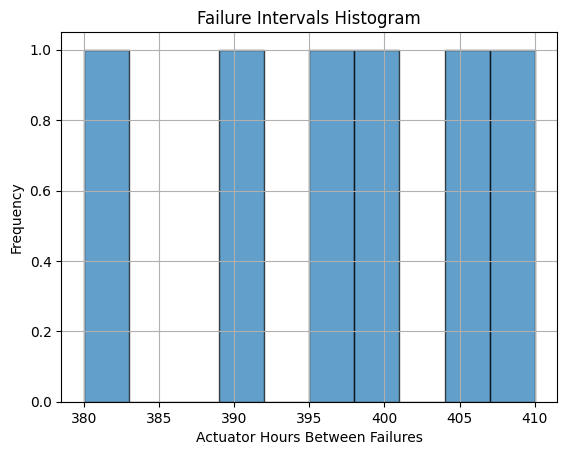

In [29]:
# Step 3: Plot histogram of failure intervals
# This helps visualize how failure intervals are distributed
plt.hist(data['Operating_Hours_Since_Last_Failure'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Failure Intervals Histogram')                     # Title of the plot
plt.xlabel('Actuator Hours Between Failures')                  # X-axis label
plt.ylabel('Frequency')                                      # Y-axis label
plt.grid(True)                                               # Add grid for readability
plt.show()                                                   # Display the plot

In [30]:
data["Failure_Date"]

0    2023-01-05
1    2023-02-15
2    2023-04-03
3    2023-06-10
4    2023-08-20
5    2023-10-01
Name: Failure_Date, dtype: object

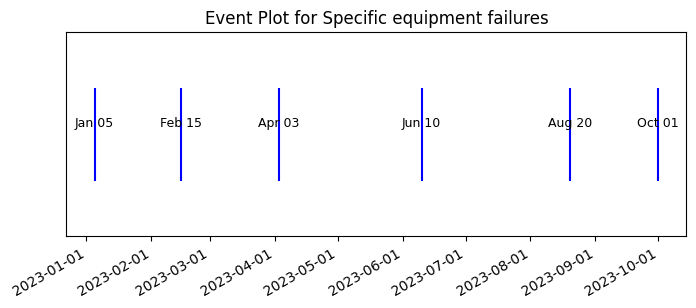

In [42]:
#Creation of plot by using eventplot

from datetime import datetime
import matplotlib.dates as mdates

# ---------------------------------------------------
# STEP 1: Parse Failure Date strings into datetime objects
# This converts the "YYYY-MM-DD" strings in the data
# into actual Python datetime instances.
# ---------------------------------------------------
dates = [datetime.strptime(d, "%Y-%m-%d") for d in data['Failure_Date']]

# ---------------------------------------------------
# STEP 2: Convert datetime objects into Matplotlib's date numbers
# Matplotlib uses numbers internally for plotting. (e.g. array([19362]= datetime(2023, 1, 5, 0, 0))
# ---------------------------------------------------
dates_numbers = mdates.date2num(dates)


# ---------------------------------------------------
# STEP 3: Create the figure and the eventplot
# An eventplot is used to mark specific instances (dates) on a timeline.
# ---------------------------------------------------
plt.figure(figsize=(8, 3))
plt.eventplot([dates_numbers], lineoffsets=1, linelengths=0.5, colors='blue')

# ---------------------------------------------------
# STEP 4: Annotate the plot
# For each date, add a text label (e.g., "Jan 03") slightly above the mark.
# ---------------------------------------------------
for d in dates:
    plt.annotate(d.strftime("%b %d"), (mdates.date2num(d), 1),
                 xytext=(0, 5), textcoords="offset points",
                 ha='center', fontsize=9)

# ---------------------------------------------------
# STEP 5: Format the X-axis
# - Set the date format for labels.
# - Let Matplotlib automatically pick sensible tick positions.
# ---------------------------------------------------
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) #Without this the labels will have gaps 

# ---------------------------------------------------
# STEP 6: Final Adjustments
# - Rotate and adjust the date labels for better readability.
# - Hide the Y-axis ticks (no relevant scale for event lines).
# - Add a title to give context.
# ---------------------------------------------------
plt.gcf().autofmt_xdate()  # Rotate and format the date labels
plt.yticks([])  # Hide the y-axis ticks
plt.title('Event Plot for Specific equipment failures')

# ---------------------------------------------------
# STEP 7: Show the Plot
# ---------------------------------------------------
plt.show()


In [37]:
dates

[datetime.datetime(2023, 1, 5, 0, 0),
 datetime.datetime(2023, 2, 15, 0, 0),
 datetime.datetime(2023, 4, 3, 0, 0),
 datetime.datetime(2023, 6, 10, 0, 0),
 datetime.datetime(2023, 8, 20, 0, 0),
 datetime.datetime(2023, 10, 1, 0, 0)]

In [32]:
dates_numbers

array([19362., 19403., 19450., 19518., 19589., 19631.])

In [33]:
# Step 4 Calculate cumulative time and failure number
data['Cumulative_Time'] = data['Operating_Hours_Since_Last_Failure'].cumsum()

#Count failure number
data['Failure_Number'] = range(1, len(data) + 1)
#Failure rate
data['Failure_Rate'] = data['Failure_Number'] / data['Cumulative_Time']

In [34]:
# --- Weibull Fit ---
shape, loc, scale = weibull_min.fit(data['Operating_Hours_Since_Last_Failure'], floc=0)  # Weibull parameters: β (shape), η (scale)

In [35]:
# Generate time points and Weibull hazard function (failure rate)
time_points = np.linspace(1, data['Cumulative_Time'].max(), 100)
weibull_failure_rate = (shape / scale) * (time_points / scale) ** (shape - 1)

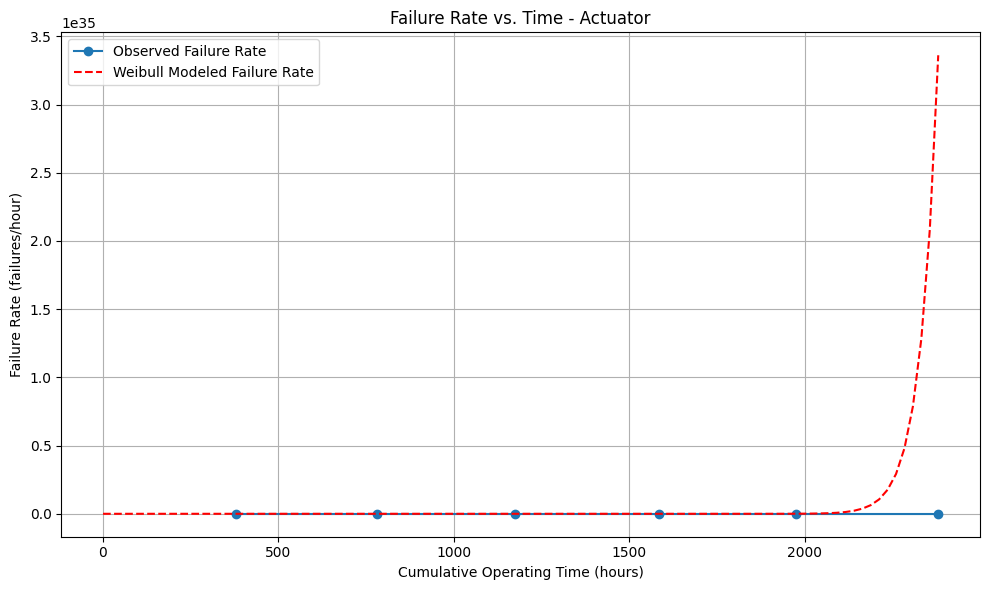

In [36]:
# --- Plot Observed and Weibull Failure Rate ---
plt.figure(figsize=(10, 6))
plt.plot(data['Cumulative_Time'], data['Failure_Rate'], marker='o', linestyle='-', label='Observed Failure Rate')
plt.plot(time_points, weibull_failure_rate, 'r--', label='Weibull Modeled Failure Rate')
plt.title('Failure Rate vs. Time - Actuator')
plt.xlabel('Cumulative Operating Time (hours)')
plt.ylabel('Failure Rate (failures/hour)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Summary 